In [ ]:
import pandas as pd

df = pd.read_csv('../datasets/breast_cancer_wisconsin_dataset.csv')

print(df.head())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [ ]:
df = df.drop(columns=['id'])

print(df.head())


  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33           184.60

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

print(df['diagnosis'].value_counts())


diagnosis
0    357
1    212
Name: count, dtype: int64


In [ ]:
print(df.columns)

df = df.dropna(axis=1, how='all')

print(df.shape)
print(df.columns)

X = df.drop(columns=['diagnosis']).values
y = df['diagnosis'].values

print("X shape:", X.shape)
print("y shape:", y.shape)


Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
(569, 31)
Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavit

In [ ]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [ ]:
from utils.scaler import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

print("First 5 rows of scaled X:\n", X_scaled[:5])


First 5 rows of scaled X:
 [[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00  9.84374905e-01
   1.56846633e+00  3.28351467e+00  2.65287398e+00  2.53247522e+00
   2.21751501e+00  2.25574689e+00  2.48973393e+00 -5.65265059e-01
   2.83303087e+00  2.48757756e+00 -2.14001647e-01  1.31686157e+00
   7.24026158e-01  6.60819941e-01  1.14875667e+00  9.07083081e-01
   1.88668963e+00 -1.35929347e+00  2.30360062e+00  2.00123749e+00
   1.30768627e+00  2.61666502e+00  2.10952635e+00  2.29607613e+00
   2.75062224e+00  1.93701461e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
  -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
   1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
   2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
  -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
   1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
  -3.75611957e-01 -4.30444219e-01 -1.46748968e-01  1.08708430e+00
  -2.43889668e

In [ ]:
from utils.train_test_split import train_test_split_custom

X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.2)

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (456, 30), X_test shape: (113, 30)
y_train shape: (456,), y_test shape: (113,)


Initial weights: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.], Initial bias: 0
Epoch 0 | Cost: 0.6911
Epoch 100 | Cost: 0.5378
Epoch 200 | Cost: 0.4502
Epoch 300 | Cost: 0.3937
Epoch 400 | Cost: 0.3540
Epoch 500 | Cost: 0.3243
Epoch 600 | Cost: 0.3011
Epoch 700 | Cost: 0.2823
Epoch 800 | Cost: 0.2667
Epoch 900 | Cost: 0.2536
Epoch 1000 | Cost: 0.2423
Epoch 1100 | Cost: 0.2324
Epoch 1200 | Cost: 0.2237
Epoch 1300 | Cost: 0.2160
Epoch 1400 | Cost: 0.2090
Epoch 1500 | Cost: 0.2028
Epoch 1600 | Cost: 0.1971
Epoch 1700 | Cost: 0.1919
Epoch 1800 | Cost: 0.1871
Epoch 1900 | Cost: 0.1827


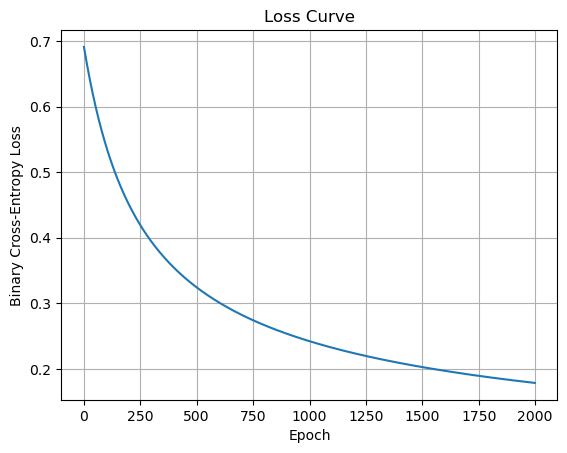

Test Accuracy: 94.69%
Precision: 0.9545
Recall: 0.9130
F1-Score: 0.9333
Confusion Matrix:
[[65  2]
 [ 4 42]]


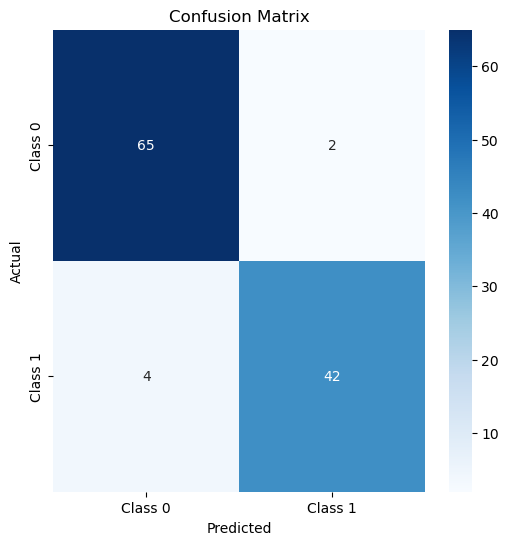

In [ ]:
import importlib
import ml_algorithms.logistic_regression
importlib.reload(ml_algorithms.logistic_regression)

from ml_algorithms.logistic_regression import LogisticRegression
from utils.metrics import PrecisionScore, RecallScore, F1Score, ConfusionMatrix

# Initialize the model
model = LogisticRegression(learning_rate=0.001, epochs=2000, lambda_=0.01)
model.fit(X_train, y_train)

acc = model.accuracy(X_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")

y_pred = model.predict(X_test)

precision_class = PrecisionScore()
recall_class = RecallScore()
f1_class = F1Score()

precision = precision_class.compute(y_test, y_pred)
recall = recall_class.compute(y_test, y_pred)
f1 = f1_class.compute(precision, recall)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

cm_class = ConfusionMatrix(num_classes=2)

cm = cm_class.compute(y_test, y_pred)

print(f"Confusion Matrix:\n{cm}")

cm_class.plot()